In [84]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Data

In [32]:
rep_mon = pd.read_csv("data/rep_mon.csv", sep=";", decimal=",")

In [33]:
rep_mon

,country_code,score,regime_type,const_form,int_dollars,gini_index,pop,region,country,color
0,NOR,9.87,Full democracy,monarchy,64856,27.0,5384576,Western Europe,Norway,#9BD2E1
1,ISL,9.58,Full democracy,republic,54482,26.8,368010,Western Europe,Iceland,#A1D3E3
2,SWE,9.39,Full democracy,monarchy,52477,28.8,10377781,Western Europe,Sweden,#A3D4E3
3,FIN,9.25,Full democracy,republic,49334,27.4,5504522,Western Europe,Finland,#A6D4E4
4,IRL,9.24,Full democracy,republic,89383,32.8,4977400,Western Europe,Ireland,#9AD2E1
...,...,...,...,...,...,...,...,...,...,...
141,TJK,1.93,Authoritarian,republic,3560,34.0,9313800,Eastern Europe,Tajikistan,#FB4108
142,TKM,1.72,Authoritarian,republic,16711,40.8,6031187,Eastern Europe,Turkmenistan,#F4F6D8
143,TCD,1.61,Authoritarian,republic,1618,43.3,16244513,Sub-Saharan Africa,Chad,#FB1209
144,CAF,1.32,Authoritarian,republic,972,56.2,5633412,Sub-Saharan Africa,Central African Republic (the),#FB1108


In [114]:
rep_mon.describe()

,score,int_dollars,gini_index,pop,cluster_labels
count,146.000000,146.000000,146.000000,1.460000e+02,146.000000
mean,5.739315,19833.239726,38.170548,5.027444e+07,4.582192
std,2.128830,19564.092344,7.989270,1.667033e+08,2.531885
min,1.130000,783.000000,24.200000,3.519650e+05,1.000000
25%,3.950000,5144.250000,32.700000,4.086893e+06,3.000000
50%,6.000000,12714.500000,36.550000,1.071622e+07,4.000000
75%,7.475000,29786.750000,43.250000,3.774150e+07,7.000000
max,9.870000,112875.000000,63.000000,1.405834e+09,10.000000


In [115]:
rep_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
country_code      146 non-null object
score             146 non-null float64
regime_type       146 non-null object
const_form        146 non-null object
int_dollars       146 non-null int64
gini_index        146 non-null float64
pop               146 non-null int64
region            146 non-null object
country           146 non-null object
color             146 non-null object
cluster_labels    146 non-null int32
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 12.1+ KB


In [61]:
# from sklearn.preprocessing import LabelEncoder  
# le = LabelEncoder()

aux = rep_mon[['score', 'const_form', 'int_dollars', 'gini_index']]
# aux.loc[:, 'const_form']=le.fit_transform(aux.loc[:, 'const_form'])

aux.loc[:,'const_form'] = aux['const_form'].astype('category').cat.codes


In [62]:
aux

,score,const_form,int_dollars,gini_index
0,9.87,0,64856,27.0
1,9.58,1,54482,26.8
2,9.39,0,52477,28.8
3,9.25,1,49334,27.4
4,9.24,1,89383,32.8
...,...,...,...,...
141,1.93,1,3560,34.0
142,1.72,1,16711,40.8
143,1.61,1,1618,43.3
144,1.32,1,972,56.2


## Data Normalization

In [76]:
from scipy.cluster.vq import whiten

aux = aux.apply(lambda x: whiten(x))

In [77]:
aux

,score,const_form,int_dollars,gini_index
0,4.652309,0.000000,3.326464,3.391166
1,4.515615,2.849628,2.794382,3.366047
2,4.426057,0.000000,2.691545,3.617244
3,4.360067,2.849628,2.530341,3.441406
4,4.355353,2.849628,4.584454,4.119639
...,...,...,...,...
141,0.909722,2.849628,0.182592,4.270358
142,0.810737,2.849628,0.857107,5.124429
143,0.758887,2.849628,0.082987,5.438426
144,0.622193,2.849628,0.049854,7.058650


# Hierarchical clustering

In [78]:
distance_matrix = linkage(aux, method = 'ward', metric = 'euclidean') # method = 'ward' / 'complete' / 'single'

# Generate cluster labels
rep_mon['cluster_labels'] = fcluster(distance_matrix, t = 10, criterion='maxclust')

In [80]:
rep_mon.loc[rep_mon['cluster_labels'] == 5, 'country'].values

array(['Turkey', 'Gabon', 'Nicaragua', 'Togo', 'Rwanda', 'Zimbabwe',
       'Comoros (the)', 'Russian Federation (the)', 'Viet Nam',
       'Cameroon', 'Djibouti', 'Iran (Islamic Republic of)', 'China',
       'Burundi', "Lao People's Democratic Republic (the)", 'Uzbekistan',
       'Tajikistan', 'Turkmenistan', 'Chad',
       'Congo (the Democratic Republic of the)'], dtype=object)

<AxesSubplot:xlabel='score', ylabel='int_dollars'>

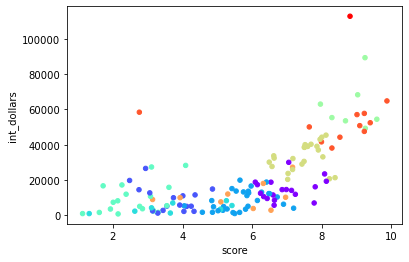

In [103]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))

rep_mon.plot.scatter(x='score', y='int_dollars', c=colors[rep_mon['cluster_labels']-1,0:4])

plt.show()

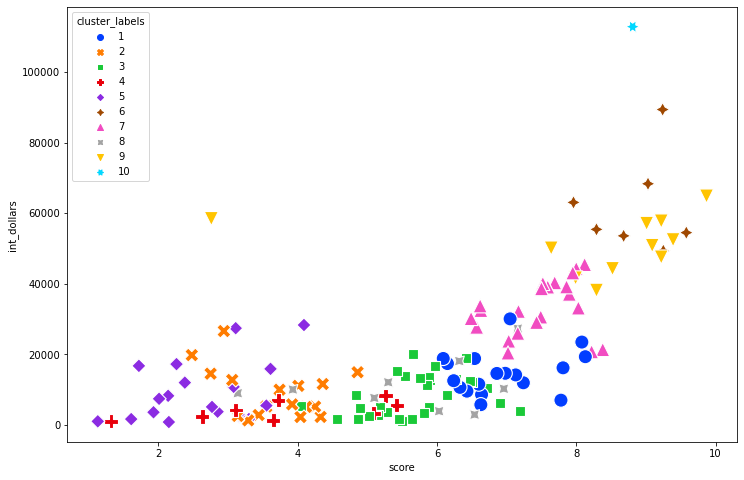

In [126]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='score', 
                y='int_dollars', 
                hue='cluster_labels', palette = 'bright',
                # size = 'pop', 
                s = 200,
                style = 'cluster_labels',
                data = rep_mon)
plt.show()

# kmeans clustering

In [56]:
kk = rep_mon['const_form'].astype('category').cat.codes
kk

0      0
1      1
2      0
3      1
4      1
      ..
141    1
142    1
143    1
144    1
145    1
Length: 146, dtype: int8

In [ ]:
kk = pd.Categorical()